In [1]:
VERSION = 33

WEIGHTED = False
TRAIN_ON_STAGE_1 = True

FOCAL_LOSS = 0
CLOUD_SINGLE = True
MIXUP = False
NO_BLACK_LOSS = True
DATA_SMALL = False

In [2]:
%run ./Code.ipynb

In [3]:
if 'train_md' not in globals() or 'test_md' not in globals():
    train_md, test_md = loadMetadata()

In [32]:
train_md, test_md = loadMetadata()

In [3]:
if 'train_md' not in globals():
    train_md = loadMetadata2()

# Pre-processing features

In [8]:
_,_ = loadMetadata(True)

In [9]:
#_ = loadMetadata2(True)

In [8]:
for ds in my_datasets3:
    preprocessedData(ds)

for ds in my_datasets5:
    preprocessedData(ds, folds=range(5))

dataset 7 fold 0 feats size torch.Size([2697008, 552])
dataset 7 fold 1 feats size torch.Size([2697008, 552])
dataset 7 fold 2 feats size torch.Size([2697008, 552])
dataset 9 fold 0 feats size torch.Size([2697008, 256])
dataset 9 fold 1 feats size torch.Size([2697008, 256])
dataset 9 fold 2 feats size torch.Size([2697008, 256])
dataset 11 fold 0 feats size torch.Size([2697008, 256])
dataset 11 fold 1 feats size torch.Size([2697008, 256])
dataset 11 fold 2 feats size torch.Size([2697008, 256])
dataset 11 fold 3 feats size torch.Size([2697008, 256])
dataset 11 fold 4 feats size torch.Size([2697008, 256])
dataset 12 fold 0 feats size torch.Size([2697008, 256])
dataset 12 fold 1 feats size torch.Size([2697008, 256])
dataset 12 fold 2 feats size torch.Size([2697008, 256])
dataset 12 fold 3 feats size torch.Size([2697008, 256])
dataset 12 fold 4 feats size torch.Size([2697008, 256])
dataset 13 fold 0 feats size torch.Size([2697008, 256])
dataset 13 fold 1 feats size torch.Size([2697008, 256]

In [4]:
preprocessedData(14,fold_col='fold5',do_test=False,folds=range(2))

dataset 14 fold 0 feats size torch.Size([3011188, 256])
dataset 14 fold 1 feats size torch.Size([3011188, 256])


# Running

In [ ]:
weight_decay = 1e-4
lrs = np.array([2e-4, 2e-5, 5e-6, 2e-6])
epochs = np.array([4, 4, 3, 2])
stg = time.time()
ds=12
folds = 2
for f in range(folds):
    for i,lr in enumerate(lrs):
        learning_rate = lr
        model, predictions, val_results = train_one(dataset=ds, epochs=epochs[i], bs=32, fold=f)
    print('total time', time.time() - stg)
print('total time', time.time() - stg)

completed epochs: 0 starting now: 4
DataSet 12 train size 17833 fold 0
adding dummy serieses 25
DataSet 12 valid size 3936 fold 0
setFeats, augmentation 0
dataset train: 17833 valid: 3936 loader train: 557 valid: 123
starting from scratch
setFeats, augmentation -1
Batch 50 device: cuda time passed: 12.868 time per batch: 0.257
Batch 100 device: cuda time passed: 22.000 time per batch: 0.220
Batch 150 device: cuda time passed: 31.766 time per batch: 0.212
Batch 200 device: cuda time passed: 42.570 time per batch: 0.213
Batch 250 device: cuda time passed: 52.031 time per batch: 0.208
Batch 300 device: cuda time passed: 61.171 time per batch: 0.204
Batch 350 device: cuda time passed: 70.580 time per batch: 0.202


In [15]:
TRAIN_ON_STAGE_1 = True

In [6]:
weight_decay = 1e-4
lrs = np.array([2e-4, 2e-5, 5e-6, 2e-6])
epochs = np.array([4, 4, 3, 2])
stg = time.time()
ds=14
folds = 2
for f in range(folds):
    for i,lr in enumerate(lrs):
        learning_rate = lr
        model, predictions, val_results = train_one(dataset=ds, epochs=epochs[i], bs=32, fold=f)
    print('total time', time.time() - stg)
print('total time', time.time() - stg)

completed epochs: 0 starting now: 4
DataSet 14 train size 17369 fold 0
adding dummy serieses 9
DataSet 14 valid size 4384 fold 0
setFeats, augmentation 0
dataset train: 17369 valid: 4384 loader train: 542 valid: 137
starting from scratch
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.805 time per batch: 0.236
Batch 100 device: cuda time passed: 20.281 time per batch: 0.203
Batch 150 device: cuda time passed: 28.928 time per batch: 0.193
Batch 200 device: cuda time passed: 37.393 time per batch: 0.187
Batch 250 device: cuda time passed: 45.609 time per batch: 0.182
Batch 300 device: cuda time passed: 53.913 time per batch: 0.180
Batch 350 device: cuda time passed: 62.033 time per batch: 0.177
Batch 400 device: cuda time passed: 70.307 time per batch: 0.176
Batch 450 device: cuda time passed: 79.923 time per batch: 0.178
Batch 500 device: cuda time passed: 87.936 time per batch: 0.176
Batch 50 device: cuda time passed: 4.289 time per batch: 0.086
Batch 100 device: cuda t

Batch 200 device: cuda time passed: 37.464 time per batch: 0.187
Batch 250 device: cuda time passed: 45.834 time per batch: 0.183
Batch 300 device: cuda time passed: 54.202 time per batch: 0.181
Batch 350 device: cuda time passed: 62.546 time per batch: 0.179
Batch 400 device: cuda time passed: 70.915 time per batch: 0.177
Batch 450 device: cuda time passed: 80.802 time per batch: 0.180
Batch 500 device: cuda time passed: 89.131 time per batch: 0.178
Batch 50 device: cuda time passed: 4.274 time per batch: 0.085
Batch 100 device: cuda time passed: 7.564 time per batch: 0.076
v31, d14, e9, f0, trn ll: 0.0319, val ll: 0.0594, ll_w: 0.0636, cor: 0.8474, auc: 0.9893, lr: 5e-06
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.278 time per batch: 0.226
Batch 100 device: cuda time passed: 20.070 time per batch: 0.201
Batch 150 device: cuda time passed: 28.666 time per batch: 0.191
Batch 200 device: cuda time passed: 37.490 time per batch: 0.187
Batch 250 device: cuda time passe

Batch 500 device: cuda time passed: 88.262 time per batch: 0.177
Batch 50 device: cuda time passed: 4.292 time per batch: 0.086
Batch 100 device: cuda time passed: 7.540 time per batch: 0.075
v31, d14, e4, f1, trn ll: 0.0335, val ll: 0.0608, ll_w: 0.0580, cor: 0.8447, auc: 0.9894, lr: 0.0002
total running time 460.02356028556824
completed epochs: 4 starting now: 4
DataSet 14 train size 17468 fold 1
adding dummy serieses 12
DataSet 14 valid size 4288 fold 1
setFeats, augmentation 0
dataset train: 17468 valid: 4288 loader train: 545 valid: 134
loading model model.b4.f1.d14.v31
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.279 time per batch: 0.226
Batch 100 device: cuda time passed: 19.941 time per batch: 0.199
Batch 150 device: cuda time passed: 28.919 time per batch: 0.193
Batch 200 device: cuda time passed: 37.326 time per batch: 0.187
Batch 250 device: cuda time passed: 45.759 time per batch: 0.183
Batch 300 device: cuda time passed: 54.133 time per batch: 0.180
Bat

Batch 100 device: cuda time passed: 7.541 time per batch: 0.075
v31, d14, e12, f1, trn ll: 0.0312, val ll: 0.0592, ll_w: 0.0569, cor: 0.8485, auc: 0.9901, lr: 2e-06
setFeats, augmentation -1
Batch 50 device: cuda time passed: 11.028 time per batch: 0.221
Batch 100 device: cuda time passed: 19.714 time per batch: 0.197
Batch 150 device: cuda time passed: 28.329 time per batch: 0.189
Batch 200 device: cuda time passed: 36.987 time per batch: 0.185
Batch 250 device: cuda time passed: 45.452 time per batch: 0.182
Batch 300 device: cuda time passed: 53.944 time per batch: 0.180
Batch 350 device: cuda time passed: 62.311 time per batch: 0.178
Batch 400 device: cuda time passed: 70.643 time per batch: 0.177
Batch 450 device: cuda time passed: 80.305 time per batch: 0.178
Batch 500 device: cuda time passed: 88.659 time per batch: 0.177
Batch 50 device: cuda time passed: 4.341 time per batch: 0.087
Batch 100 device: cuda time passed: 7.787 time per batch: 0.078
v31, d14, e13, f1, trn ll: 0.0312

In [6]:
train_md.weights.value_counts()

0.187007    220677
0.016056    217939
2.233320    183128
1.000000     78545
5.343628     41265
0.000000     11242
0.458805         1
Name: weights, dtype: int64

In [5]:
train_md.weights = train_md.weights.fillna(1)

In [11]:
weight_decay = 1e-4
lrs = np.array([1e-5, 5e-6])
epochs = np.array([2, 1])
stg = time.time()
WEIGHTED = True
for ds in range(12,13):
    #folds = getNFolds(ds)
    folds = 2
    for f in range(folds):
        for i,lr in enumerate(lrs):
            learning_rate = lr
            model, predictions, val_results = train_one(dataset=ds, epochs=epochs[i], bs=32, fold=f, init_ver=31)
        print('total time', time.time() - stg)
    print('total time', time.time() - stg)
print('total time', time.time() - stg)

completed epochs: 0 starting now: 2
DataSet 12 train size 15619 fold 0
adding dummy serieses 25
DataSet 12 valid size 3936 fold 0
setFeats, augmentation 0
WeightedRandomSampler
dataset train: 15619 valid: 3936 loader train: 488 valid: 123
loading model model.b13.f0.d12.v31
setFeats, augmentation -1
Batch 50 device: cuda time passed: 9.758 time per batch: 0.195
Batch 100 device: cuda time passed: 17.077 time per batch: 0.171
Batch 150 device: cuda time passed: 24.532 time per batch: 0.164
Batch 200 device: cuda time passed: 32.364 time per batch: 0.162
Batch 250 device: cuda time passed: 39.801 time per batch: 0.159
Batch 300 device: cuda time passed: 47.355 time per batch: 0.158
Batch 350 device: cuda time passed: 55.035 time per batch: 0.157
Batch 400 device: cuda time passed: 62.515 time per batch: 0.156
Batch 450 device: cuda time passed: 70.772 time per batch: 0.157
Batch 50 device: cuda time passed: 4.077 time per batch: 0.082
Batch 100 device: cuda time passed: 7.169 time per bat

In [ ]:
old/new
2 folds
weighted/not

In [9]:
(5*3 + 3*3)*(9241.546682834625 + 2074.936990737915)/5/3600

15.08864489809672

In [18]:
stats1 = pd.concat([pd.read_csv(PATH_WORK/'stats.f{}.v{}'.format(0,31)),
                    pd.read_csv(PATH_WORK/'stats.f{}.v{}'.format(1,31))], axis=0, sort=False)

In [19]:
stats2 = pd.concat([pd.read_csv(PATH_WORK/'stats.f{}.v{}'.format(0,32)),
                    pd.read_csv(PATH_WORK/'stats.f{}.v{}'.format(1,32))], axis=0, sort=False)

In [20]:
stats = pd.concat([stats1.loc[stats1.epoch == 13], stats2.loc[stats2.epoch == 3]])

In [26]:
stats['weighted_training'] = stats.epoch == 3

In [27]:
stats.groupby(['fold','weighted_training','dataset'])[['val_loss','val_w_loss']].mean()

val_loss  val_w_loss
fold weighted_training dataset                      
0    False             12       0.059201    0.064282
                       14       0.059394    0.063065
     True              12       0.060360    0.063039
                       14       0.061043    0.062914
1    False             12       0.059864    0.058066
                       14       0.059391    0.057033
     True              12       0.060730    0.057532
                       14       0.060324    0.056965

# Analysis

In [13]:
stats = pd.concat([pd.read_csv(PATH_WORK/'stats.f{}.v{}'.format(f,31)) for f in range(5)],axis=0)
stats.loc[stats.epoch==13].groupby('dataset')[['val_loss','val_w_loss']].mean()

,val_loss,val_w_loss
dataset,,
6,0.063542,0.069056
7,0.062726,0.068622
8,0.064020,0.069777
9,0.062367,0.067991
10,0.062012,0.067773
11,0.061149,0.066677
12,0.060799,0.066053
13,0.061087,0.066270


In [11]:
stats = pd.concat([pd.read_csv(PATH_WORK/'stats.f{}.v{}'.format(f,32)) for f in range(5)],axis=0)
stats.loc[stats.epoch==3].groupby('dataset')[['val_loss','val_w_loss']].mean()

,val_loss,val_w_loss
dataset,,
6,0.064378,0.068053
7,0.063824,0.067963
8,0.065129,0.068768
9,0.062979,0.067057
10,0.062737,0.067054
11,0.061973,0.065464
12,0.061613,0.064652
13,0.061888,0.064962


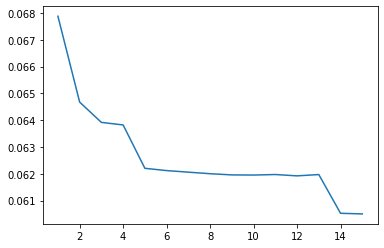

In [14]:
plt.plot(stats.groupby('epoch').mean().val_loss)

In [53]:
predictions.shape

(3941, 60, 6)

In [54]:
predictions.mean((0,1))

array([0.360946  , 0.15772094, 0.21251288, 0.22738211, 0.23613851,
       0.2085103 ], dtype=float32)

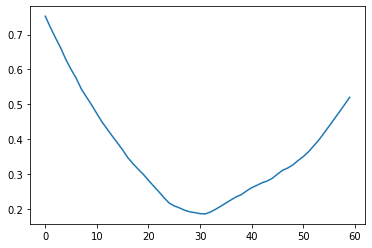

In [55]:
plt.plot(predictions.mean(0)[:,0])

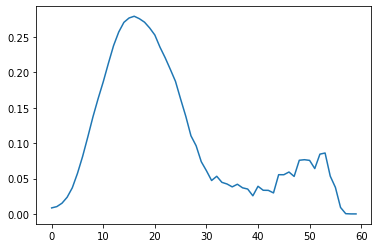

In [56]:
dd = train_md.loc[train_md.fold5==4].copy()
dd['res'] = val_results[:,0]

plt.plot(dd[['res','pos_idx']].groupby('pos_idx').mean().values)